In [1]:
import numpy as np
import pandas as pd

In [3]:
file_name = "Lab Session Data.xlsx"
sheet_name1 = 'Purchase data'
data1 = pd.read_excel(io = file_name, sheet_name = sheet_name1)

In [5]:
data1

Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16             2                 4           198   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   
5         NaN         NaN         NaN         NaN         NaN  ...   
6         NaN         NaN         NaN         NaN         NaN  ...   
7         NaN         NaN         NaN         NaN         NaN  ...   
8         NaN         NaN         NaN         NaN         NaN  ...   
9         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   
5          NaN          NaN          NaN          NaN          NaN   
6          NaN          NaN          NaN          NaN          NaN   
7          NaN          NaN          NaN          NaN          NaN   
8          NaN          NaN          NaN          NaN          NaN   
9          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 17  Unnamed: 18  Candy  Mango  Milk  
0          NaN          NaN    1.0   55.0  18.0  
1          NaN          NaN    NaN    NaN   NaN  
2          NaN          NaN    NaN    NaN   NaN  
3          NaN          NaN    NaN    NaN   NaN  
4          NaN          NaN    NaN    NaN   NaN  
5          NaN          NaN    NaN    NaN   NaN  
6          NaN          NaN    NaN    NaN   NaN  
7          NaN          NaN    NaN    NaN   NaN  
8          NaN          NaN    NaN    NaN   NaN  
9          NaN          NaN    NaN    NaN   NaN  

[10 rows x 22 columns]

In [6]:
A = data1[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']]
C = data1[['Payment (Rs)']]

In [7]:
A_matrix = np.array(A)

In [8]:
C_matrix = np.array(C)

In [9]:
A_matrix

array([[20,  6,  2],
       [16,  3,  6],
       [27,  6,  2],
       [19,  1,  2],
       [24,  4,  2],
       [22,  1,  5],
       [15,  4,  2],
       [18,  4,  2],
       [21,  1,  4],
       [16,  2,  4]], dtype=int64)

In [10]:
C_matrix

array([[386],
       [289],
       [393],
       [110],
       [280],
       [167],
       [271],
       [274],
       [148],
       [198]], dtype=int64)

In [11]:
A_matrix.shape

(10, 3)

In [12]:
C_matrix.shape

(10, 1)

In [13]:
def matrix_dimension(matrix):
    print("Dimensions of the given matrix:", matrix.shape[0], "*", matrix.shape[1])
    
def vectors_count(matrix):
    print("Number of vectors present in the given matrix:", matrix.shape[0])

def matrix_rank(matrix):
    rank = np.linalg.matrix_rank(matrix)
    print("Rank of the given matrix:", rank)
    return rank

def matrix_pseudo_inverse(matrix):
    pseudo_inverse = np.linalg.pinv(matrix)
    print("Pseudo Inverse of the given matrix:\n", pseudo_inverse)

In [14]:
matrix_dimension(A_matrix)

Dimensions of the given matrix: 10 * 3


In [15]:
matrix_dimension(C_matrix)

Dimensions of the given matrix: 10 * 1


In [16]:
vectors_count(C_matrix)

Number of vectors present in the given matrix: 10


In [17]:
matrix_rank(A_matrix)

Rank of the given matrix: 3


3

In [18]:
matrix_pseudo_inverse(A_matrix)

Pseudo Inverse of the given matrix:
 [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


We can't find rank and inverse of C matrix as it is not a square matrix

In [19]:
def predict_model_vector(matrix_A, matrix_C):
    pseudo_inverse = np.linalg.pinv(matrix_A)
    prediction = np.dot(pseudo_inverse, matrix_C)
    return prediction

In [20]:
predict_model_vector(A_matrix, C_matrix)

array([[ 1.],
       [55.],
       [18.]])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [22]:
def label_rich_poor(data):
    data['Class'] = np.where(data['Payment (Rs)'] > 200, 'RICH', 'POOR')
    return data

In [24]:
label_rich_poor(data1)

Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16             2                 4           198   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   
5         NaN         NaN         NaN         NaN         NaN  ...   
6         NaN         NaN         NaN         NaN         NaN  ...   
7         NaN         NaN         NaN         NaN         NaN  ...   
8         NaN         NaN         NaN         NaN         NaN  ...   
9         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   
5          NaN          NaN          NaN          NaN          NaN   
6          NaN          NaN          NaN          NaN          NaN   
7          NaN          NaN          NaN          NaN          NaN   
8          NaN          NaN          NaN          NaN          NaN   
9          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 18  Candy  Mango  Milk  Class  
0          NaN    1.0   55.0  18.0   RICH  
1          NaN    NaN    NaN   NaN   RICH  
2          NaN    NaN    NaN   NaN   RICH  
3          NaN    NaN    NaN   NaN   POOR  
4          NaN    NaN    NaN   NaN   RICH  
5          NaN    NaN    NaN   NaN   POOR  
6          NaN    NaN    NaN   NaN   RICH  
7          NaN    NaN    NaN   NaN   RICH  
8          NaN    NaN    NaN   NaN   POOR  
9          NaN    NaN    NaN   NaN   POOR  

[10 rows x 23 columns]

In [25]:
def classify_rich_poor(data):
    X = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    Y = data['Class'].values
   
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
   
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)
   
    model = LogisticRegression()
    model.fit(X_train, Y_train)
   
    Y_pred = model.predict(X_test)
    
    return classification_report(Y_test, Y_pred)

In [27]:
print(classify_rich_poor(data1))

              precision    recall  f1-score   support

        POOR       0.67      1.00      0.80         2
        RICH       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
sheet_name2 = 'IRCTC Stock Price'
data2 = pd.read_excel(file_name, sheet_name=sheet_name2)
price = data2.iloc[:, 3]

In [38]:
def price_mean_population(data):
    mean = price.mean()
    variance = price.var()
    print(f"Mean of 'Price Data': {mean}")
    print(f"Variance of 'Price Data': {variance}")

In [40]:
price_mean_population(data2)

Mean of 'Price Data': 1560.6634538152612
Variance of 'Price Data': 58732.36535253922


In [44]:
def price_mean_particular_day(data, day):
    day_data = data[data['Day'] == day]
    sample_mean = day_data['Price'].mean()
    print(f"Sample Mean ({day}): {sample_mean}")

In [45]:
price_mean_particular_day(data2, 'Wed')

Sample Mean (Wed): 1550.7060000000001


In [46]:
def price_mean_particular_month(data, month):
    month_data = data[data['Month'] == month]
    sample_mean = month_data['Price'].mean()
    print(f"Sample Mean ({month}): {sample_mean}")

In [48]:
price_mean_particular_month(data2, 'Apr')

Sample Mean (Apr): 1698.9526315789474


In [50]:
def probability_of_loss(data):
    if data['Chg%'].dtype == 'object':
        data['Chg%'] = data['Chg%'].str.rstrip('%').astype(float) / 100
    else:
        data['Chg%'] = data['Chg%'].astype(float) / 100
    total = len(data)
    loss_over_stick = data['Chg%'].apply(lambda x: x < 0).sum()
    probability = loss_over_stick/total
    print(f"Probability of making a loss: {probability:.2%}")

In [51]:
probability_of_loss(data2)

Probability of making a loss: 49.80%


In [66]:
def prob_of_profit_particular_day(data, day):
    day_data = data[data['Day'] == day]
    if data['Chg%'].dtype == 'object':
        data['Chg%'] = data['Chg%'].str.rstrip('%').astype(float) / 100
    total = len(day_data)
    day_profit = (day_data['Chg%'] > 0).sum()
    prob_day_profit = day_profit / total
    print(f"Probability of making a profit on {day}: {prob_day_profit:.2%}")
    return prob_day_profit


In [67]:
prob_of_profit_particular_day(data2, 'Wed')

Probability of making a profit on Wed: 42.00%


0.42

In [68]:
def probability_of_profit(data):
    if data['Chg%'].dtype == 'object':
        data['Chg%'] = data['Chg%'].str.rstrip('%').astype(float) / 100
    total = len(data)
    profit_days = (data['Chg%'] > 0).sum()
    probability = profit_days / total
    print(f"Probability of making a profit: {probability:.2%}")
    return probability


In [69]:
def conditional_prob_given_day(data, day):
    prob_profit_day = prob_of_profit_particular_day(data, day)
    prob_overall_profit = probability_of_profit(data)
    cond_prob = prob_profit_day / prob_overall_profit
    print(f"Conditional Probability of making a profit on {day}: {cond_prob:.2%}")
    return cond_prob

In [70]:
conditional_prob_given_day(data2, 'Wed')

Probability of making a profit on Wed: 42.00%
Probability of making a profit: 49.80%
Conditional Probability of making a profit on Wed: 84.34%


0.8433870967741935

In [71]:
import matplotlib.pyplot as plt

In [72]:
def plot_chg_vs_day(data):
    if data['Chg%'].dtype == 'object':
        data['Chg%'] = data['Chg%'].str.rstrip('%').astype(float) / 100
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Day'], data['Chg%'], color='blue', alpha=0.7)
    plt.title('Scatter Plot of Chg% vs. Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.show()

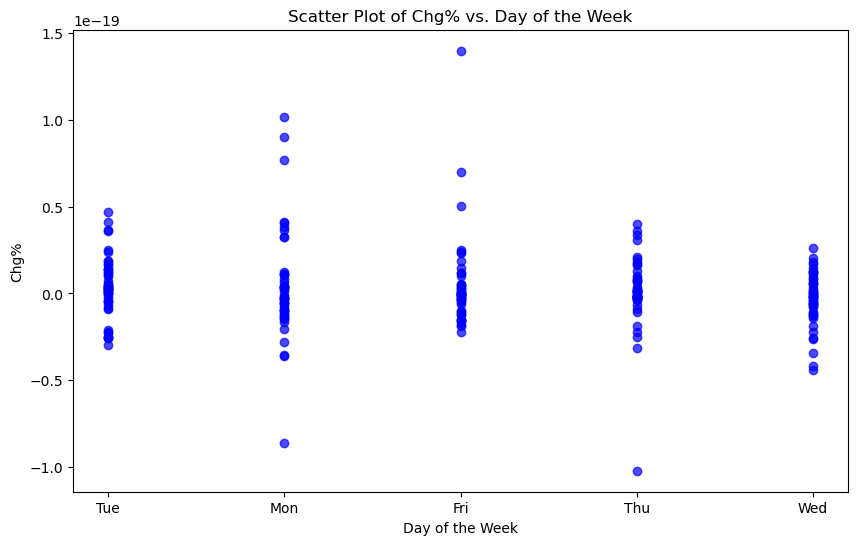

In [73]:
plot_chg_vs_day(data2)

In [126]:
sheet_name3='thyroid0387_UCI'

data3 = pd.read_excel(file_name, sheet_name=sheet_name3)

data3.replace('?', np.nan, inplace=True)

In [127]:
data3

Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f    f        f               f              f   
3                            f    f        f               f              f   
4                            f    f        f               f              f   
...                        ...  ...      ...             ...            ...   
9167                         f    f        f               f              f   
9168                         f    f        f               f              f   
9169                         f    f        f               f              f   
9170                         f    f        f               f              f   
9171                         f    f        f               f              f   

      ... TT4 measured    TT4 T4U measured   T4U FTI measured   FTI  \
0     ...            f    NaN            f   NaN            f   NaN   
1     ...            t  128.0            f   NaN            f   NaN   
2     ...            f    NaN            f   NaN            f   NaN   
3     ...            f    NaN            f   NaN            f   NaN   
4     ...            f    NaN            f   NaN            f   NaN   
...   ...          ...    ...          ...   ...          ...   ...   
9167  ...            t   64.0            t  0.83            t  77.0   
9168  ...            t   91.0            t  0.92            t  99.0   
9169  ...            t  113.0            t  1.27            t  89.0   
9170  ...            t   75.0            t  0.85            t  88.0   
9171  ...            t   66.0            t  1.02            t  65.0   

     TBG measured   TBG  referral source     Condition  
0               f   NaN            other  NO CONDITION  
1               f   NaN            other  NO CONDITION  
2               t  11.0            other  NO CONDITION  
3               t  26.0            other  NO CONDITION  
4               t  36.0            other             S  
...           ...   ...              ...           ...  
9167            f   NaN              SVI  NO CONDITION  
9168            f   NaN              SVI  NO CONDITION  
9169            f   NaN              SVI             I  
9170            f   NaN            other  NO CONDITION  
9171            f   NaN            other  NO CONDITION  

[9172 rows x 31 columns]

In [128]:
def find_datatypes(data):
    print(data.dtypes)

In [129]:
find_datatypes(data3)

Record ID                      int64
age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
T

In [130]:
def find_categorical_attributes(data):
    categorical_attributes=data.select_dtypes(include=['object']).columns.tolist()
    return categorical_attributes

In [131]:
find_categorical_attributes(data3)

['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'T3 measured',
 'TT4 measured',
 'T4U measured',
 'FTI measured',
 'TBG measured',
 'referral source',
 'Condition']

In [132]:
def find_numeric_attributes(data):
    numeric_columns=data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return numeric_columns

In [133]:
find_numeric_attributes(data3)

['Record ID', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [134]:
def find_missing_values(data):
    return [column for column in data.columns if data[column].isnull().sum() > 0]

In [135]:
find_missing_values(data3)

['sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [136]:
def mean_variance_sd(data):
    numeric_columns = find_numeric_attributes(data)
    for column in numeric_columns:
        mean = data[column].mean()
        SD = data[column].std()
        variance = data[column].var()
        print(f"Column:{column}")
        print(f"Mean:{mean}")
        print(f"Variance:{variance}")
        print(f"Standard deviation:{SD}")

In [137]:
mean_variance_sd(data3)

Column:Record ID
Mean:852947346.6122983
Variance:57486250586150.34
Standard deviation:7581968.780346589
Column:age
Mean:73.55582206716092
Variance:1401800.8688713463
Standard deviation:1183.9767180444667
Column:TSH
Mean:5.218402753781513
Variance:584.866153209295
Standard deviation:24.184006144749777
Column:T3
Mean:1.970628805724726
Variance:0.7877961683561565
Standard deviation:0.8875788237425206
Column:TT4
Mean:108.70030469644902
Variance:1407.950791475491
Standard deviation:37.52267036706598
Column:T4U
Mean:0.9760557216309935
Variance:0.04014430639006391
Standard deviation:0.2003604411805482
Column:FTI
Mean:113.64074551935484
Variance:1726.539585061158
Standard deviation:41.551649606979
Column:TBG
Mean:29.87005729512894
Variance:444.38764299946627
Standard deviation:21.080503860189545


In [146]:
def study_outliers(data):
    numeric_columns=find_numeric_attributes(data)
    for column in numeric_columns:
        mean=data[column].mean()
        std_dev=data[column].std()
        variance=data[column].var()
        print(f"Column:{column}")
        lower_bound=mean-3*std_dev
        upper_bound=mean+3*std_dev
        outliers=data[(data[column]<lower_bound)|(data[column]>upper_bound)]
        print(f"Potential outliers in {column}:\n{outliers[[column]]}\n")

In [147]:
study_outliers(data3)

Column:Record ID
Potential outliers in Record ID:
Empty DataFrame
Columns: [Record ID]
Index: []

Column:age
Potential outliers in age:
        age
5710  65511
6392  65512
8105  65526

Column:TSH
Potential outliers in TSH:
        TSH
43    140.0
79     90.0
180    88.0
234    80.0
235   176.0
...     ...
8509  198.0
8866  500.0
9004  106.0
9045   85.0
9065   78.0

[100 rows x 1 columns]

Column:T3
Potential outliers in T3:
            T3
151   7.600000
354   6.600000
367   4.700000
427   8.599999
494   7.600000
...        ...
8731  5.700000
8740  5.900000
8902  6.700000
8975  4.700000
9024  8.000000

[86 rows x 1 columns]

Column:TT4
Potential outliers in TT4:
        TT4
100   308.0
151   250.0
199   236.0
292   222.0
367   242.0
...     ...
8383  226.0
8518  240.0
8677  239.0
8885  234.0
8902  280.0

[101 rows x 1 columns]

Column:T4U
Potential outliers in T4U:
       T4U
107   1.83
169   0.32
170   0.32
242   1.79
254   1.73
...    ...
8864  1.58
8908  1.75
9081  1.79
9097  2.03
91

In [153]:
def impute_with_mean(data, column):
    """Impute missing values in a column with the mean."""
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)
    print(f"Imputed missing values in '{column}' with Mean: {mean_value}")

In [154]:
def impute_with_median(data, column):
    """Impute missing values in a column with the median."""
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)
    print(f"Imputed missing values in '{column}' with Median: {median_value}")

In [155]:
def impute_with_mode(data, column):
    """Impute missing values in a column with the mode."""
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)
    print(f"Imputed missing values in '{column}' with Mode: {mode_value}")

In [156]:
def decide_imputation_strategy(data, column):
    """Decide the imputation strategy based on data type and distribution."""
    if data[column].dtype in ['int64', 'float64']:  # Numeric data
        if data[column].skew() > 1:  # Highly skewed data (outliers present)
            impute_with_median(data, column)
        else:  # No significant skew
            impute_with_mean(data, column)
    else:  # Categorical data
        impute_with_mode(data, column)

In [157]:
def impute_missing_values(data):
    """Impute missing values for all columns in the dataset."""
    for column in data.columns:
        if data[column].isnull().sum() > 0:  # Check if there are missing values
            decide_imputation_strategy(data, column)
    return data

In [158]:
cleaned_data = impute_missing_values(data3)
cleaned_data

Imputed missing values in 'sex' with Mode: F
Imputed missing values in 'TSH' with Median: 1.4
Imputed missing values in 'T3' with Median: 1.9
Imputed missing values in 'TT4' with Median: 104.0
Imputed missing values in 'T4U' with Median: 0.96
Imputed missing values in 'FTI' with Median: 109.0
Imputed missing values in 'TBG' with Median: 26.0


Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f    f        f               f              f   
3                            f    f        f               f              f   
4                            f    f        f               f              f   
...                        ...  ...      ...             ...            ...   
9167                         f    f        f               f              f   
9168                         f    f        f               f              f   
9169                         f    f        f               f              f   
9170                         f    f        f               f              f   
9171                         f    f        f               f              f   

      ... TT4 measured    TT4 T4U measured   T4U FTI measured    FTI  \
0     ...            f  104.0            f  0.96            f  109.0   
1     ...            t  128.0            f  0.96            f  109.0   
2     ...            f  104.0            f  0.96            f  109.0   
3     ...            f  104.0            f  0.96            f  109.0   
4     ...            f  104.0            f  0.96            f  109.0   
...   ...          ...    ...          ...   ...          ...    ...   
9167  ...            t   64.0            t  0.83            t   77.0   
9168  ...            t   91.0            t  0.92            t   99.0   
9169  ...            t  113.0            t  1.27            t   89.0   
9170  ...            t   75.0            t  0.85            t   88.0   
9171  ...            t   66.0            t  1.02            t   65.0   

     TBG measured   TBG  referral source     Condition  
0               f  26.0            other  NO CONDITION  
1               f  26.0            other  NO CONDITION  
2               t  11.0            other  NO CONDITION  
3               t  26.0            other  NO CONDITION  
4               t  36.0            other             S  
...           ...   ...              ...           ...  
9167            f  26.0              SVI  NO CONDITION  
9168            f  26.0              SVI  NO CONDITION  
9169            f  26.0              SVI             I  
9170            f  26.0            other  NO CONDITION  
9171            f  26.0            other  NO CONDITION  

[9172 rows x 31 columns]

In [159]:
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out = ((series < lower_bound) | (series > upper_bound))
    return out.any()

In [168]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [169]:
def normalize(series):
    outliers = has_outliers(series)
    if outliers:
        scaler = MinMaxScaler()
        normalize_data = scaler.fit_transform(series.values.reshape(-1, 1))
        return normalize_data.flatten()
    else:
        return stats.zscore(series)

In [172]:
def normalize_data(data):
    numeric_c = find_numeric_attributes(data[1:])
    for col in numeric_c:
        data[col] = normalize(data[col])
    return data

In [173]:
normalize_data(data3)

Record ID       age sex on thyroxine query on thyroxine  \
0     -1.602090  0.000427   F            f                  f   
1     -1.602090  0.000427   F            f                  f   
2     -1.602086  0.000610   F            f                  f   
3     -1.601822  0.000534   F            f                  f   
4     -1.601822  0.000473   F            f                  f   
...         ...       ...  ..          ...                ...   
9167   2.264928  0.000839   M            f                  f   
9168   2.264928  0.000320   M            f                  f   
9169   2.264928  0.001038   M            f                  f   
9170   2.264928  0.000702   F            f                  f   
9171   2.264929  0.000458   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f    f        f               f              f   
3                            f    f        f               f              f   
4                            f    f        f               f              f   
...                        ...  ...      ...             ...            ...   
9167                         f    f        f               f              f   
9168                         f    f        f               f              f   
9169                         f    f        f               f              f   
9170                         f    f        f               f              f   
9171                         f    f        f               f              f   

      ... TT4 measured       TT4 T4U measured       T4U FTI measured  \
0     ...            f  0.170569            f  0.365741            f   
1     ...            t  0.210702            f  0.365741            f   
2     ...            f  0.170569            f  0.365741            f   
3     ...            f  0.170569            f  0.365741            f   
4     ...            f  0.170569            f  0.365741            f   
...   ...          ...       ...          ...       ...          ...   
9167  ...            t  0.103679            t  0.305556            t   
9168  ...            t  0.148829            t  0.347222            t   
9169  ...            t  0.185619            t  0.509259            t   
9170  ...            t  0.122074            t  0.314815            t   
9171  ...            t  0.107023            t  0.393519            t   

           FTI TBG measured       TBG  referral source     Condition  
0     0.122328            f  0.129565            other  NO CONDITION  
1     0.122328            f  0.129565            other  NO CONDITION  
2     0.122328            t  0.054527            other  NO CONDITION  
3     0.122328            t  0.129565            other  NO CONDITION  
4     0.122328            t  0.179590            other             S  
...        ...          ...       ...              ...           ...  
9167  0.085948            f  0.129565              SVI  NO CONDITION  
9168  0.110960            f  0.129565              SVI  NO CONDITION  
9169  0.099591            f  0.129565              SVI             I  
9170  0.098454            f  0.129565            other  NO CONDITION  
9171  0.072306            f  0.129565            other  NO CONDITION  

[9172 rows x 31 columns]

In [183]:
sheet_name3 = 'marketing_campaign'
data4=pd.read_excel(file_name, sheet_name=sheet_name3)
data4.replace('?', np.nan, inplace=True)

In [186]:
def similarity_measure(data):
    binary_vectors = data.iloc[:2, :].applymap(lambda x: 1 if x else 0)
    f11 = np.sum((binary_vectors.iloc[0] == 1) & (binary_vectors.iloc[1] == 1))
    f01 = np.sum((binary_vectors.iloc[0] == 0) & (binary_vectors.iloc[1] == 1))
    f10 = np.sum((binary_vectors.iloc[0] == 1) & (binary_vectors.iloc[1] == 0))
    f00 = np.sum((binary_vectors.iloc[0] == 0) & (binary_vectors.iloc[1] == 0))


    JC = f11 / (f01 + f10 + f11)
    SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
    print(f"Jaccard Coefficient: {JC}")
    print(f"Simple Matching Coefficient: {SMC}")

In [187]:
similarity_measure(data4)

Jaccard Coefficient: 0.8695652173913043
Simple Matching Coefficient: 0.896551724137931


In [209]:
def preprocess_feature(data, feature_column):
    data[feature_column] = pd.to_numeric(data[feature_column], errors='coerce')
    data[feature_column] = data[feature_column].fillna(0)
    return data

In [210]:
from sklearn.metrics.pairwise import cosine_similarity

In [211]:
def calculate_cosine_similarity(data):
    if len(data) < 2:
        print("Not enough data in the DataFrame.")
        return

    feature_column = data.columns[1]

    data = preprocess_feature(data, feature_column)

    v1 = data.iloc[0][feature_column]
    v2 = data.iloc[1][feature_column]

    print(f"Values being compared: {v1} vs {v2} ")

    v1_vector = np.array([[v1]])
    v2_vector = np.array([[v2]])

    similarity = cosine_similarity(v1_vector, v2_vector)[0, 0]

    print(f"Cosine Similarity between the second features: {similarity}")

In [212]:
print("DataFrame 1:")
calculate_cosine_similarity(data1)
print("\nDataFrame 2:")
calculate_cosine_similarity(data2)
print("\nDataFrame 3:")
calculate_cosine_similarity(data3)
print("\nDataFrame 4:")
calculate_cosine_similarity(data4)

DataFrame 1:
Values being compared: 20 vs 16 
Cosine Similarity between the second features: 1.0

DataFrame 2:
Values being compared: 0.0 vs 0.0 
Cosine Similarity between the second features: 0.0

DataFrame 3:
Values being compared: 0.0004273178176268599 vs 0.0004273178176268599 
Cosine Similarity between the second features: 1.0

DataFrame 4:
Values being compared: 1957 vs 1954 
Cosine Similarity between the second features: 1.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
def jaccard_coefficient(vector1, vector2):
    intersection = np.sum((vector1 == 1) & (vector2 == 1))
    union = np.sum((vector1 == 1) | (vector2 == 1))
    jc = intersection / union if union != 0 else 0
    return jc

def simple_matching_coefficient(vector1, vector2):
    matches = (vector1 == vector2).sum()
    smc = matches / len(vector1)
    return smc

def calculate_cosine_similarity(v1, v2):
    similarity = cosine_similarity(v1.values.reshape(1, -1), v2.values.reshape(1, -1))[0, 0]
    return similarity

In [219]:
def compute_coefficients(df):
    # Handle NaN values by filling with the mean of only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    # Double-check for any remaining NaN values and fill with 0 (or another strategy)
    df[numeric_cols] = df[numeric_cols].fillna(0)
    
    num_vectors = len(df)
    jc_matrix = np.zeros((num_vectors, num_vectors))
    smc_matrix = np.zeros((num_vectors, num_vectors))
    cos_matrix = np.zeros((num_vectors, num_vectors))
    
    # Filter out non-numeric columns for cosine similarity
    numeric_df = df[numeric_cols]
    
    for i in range(num_vectors):
        for j in range(i, num_vectors):
            v1 = df.iloc[i]
            v2 = df.iloc[j]
            
            # Identify binary columns
            binary_cols = df.columns[df.apply(lambda col: col.nunique() == 2, axis=0)]
            v1_binary = v1[binary_cols]
            v2_binary = v2[binary_cols]
            
            # Calculate Jaccard Coefficient (only for binary columns)
            jc_matrix[i, j] = jaccard_coefficient(v1_binary, v2_binary)
            jc_matrix[j, i] = jc_matrix[i, j]  # Because JC is symmetric
            
            # Calculate Simple Matching Coefficient (only for binary columns)
            smc_matrix[i, j] = simple_matching_coefficient(v1_binary, v2_binary)
            smc_matrix[j, i] = smc_matrix[i, j]  # Because SMC is symmetric
            
            # Calculate Cosine Similarity (for numeric columns only)
            v1_numeric = numeric_df.iloc[i]
            v2_numeric = numeric_df.iloc[j]
            cos_matrix[i, j] = calculate_cosine_similarity(v1_numeric, v2_numeric)
            cos_matrix[j, i] = cos_matrix[i, j]  # Because Cosine Similarity is symmetric
    
    return jc_matrix, smc_matrix, cos_matrix

In [ ]:
jc1, smc1, cos1 = compute_coefficients(data1)
jc2, smc2, cos2 = compute_coefficients(data2)
jc3, smc3, cos3 = compute_coefficients(data3)
jc4, smc4, cos4 = compute_coefficients(data4)

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_54880\2090856480.py:9

In [ ]:
# Plotting Heatmaps
def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', square=True, 
                xticklabels=np.arange(1, len(matrix)+1), 
                yticklabels=np.arange(1, len(matrix)+1))
    plt.title(title)
    plt.xlabel('Vector Index')
    plt.ylabel('Vector Index')
    plt.show()

plot_heatmap(jc1, 'Jaccard Coefficient - DataFrame 1')
plot_heatmap(smc1, 'Simple Matching Coefficient - DataFrame 1')
plot_heatmap(cos1, 'Cosine Similarity - DataFrame 1')

plot_heatmap(jc2, 'Jaccard Coefficient - DataFrame 2')
plot_heatmap(smc2, 'Simple Matching Coefficient - DataFrame 2')
plot_heatmap(cos2, 'Cosine Similarity - DataFrame 2')

plot_heatmap(jc3, 'Jaccard Coefficient - DataFrame 3')
plot_heatmap(smc3, 'Simple Matching Coefficient - DataFrame 3')
plot_heatmap(cos3, 'Cosine Similarity - DataFrame 3')

plot_heatmap(jc4, 'Jaccard Coefficient - DataFrame 4')
plot_heatmap(smc4, 'Simple Matching Coefficient - DataFrame 4')
plot_heatmap(cos4, 'Cosine Similarity - DataFrame 4')